# Проверка гипотез. 

# 1. Задачка на монетку

Построить критерий для проверки гипотезы $H_0: p \!= 1/2$ при альтернативной гипотезе $H_1 : p \neq  1/2$ по результатам восьми испытаний, подчиняющихся схеме Бернулли. Вероятность ошибки первого рода $\alpha $ положить равной 0.05.



### Ошибки

![](./stat_errors.png)

В статистике различаются два вида ошибок: 
  * ошибка первого рода -- когда мы отвергаем гипотезу, а она верна;
  * ошибка второго рода -- когда мы __не__ отвергаем гипотезу, а она не верна.
    (т.е. неверно приняли приняли нулевую гипотезу)
  
  
![](https://openlab-flowers.inria.fr/uploads/default/original/2X/7/703b9d4e3037b266e8fc6b20e020eb84d4405a80.png)


$$p\mathrm{-value} = 1 - \int\limits_{-\infty}^{t_{\alpha}} p_{H_0}(t) dt$$


Теперь мы фиксируем ошибку первого рода:

$$\alpha=0.05$$

Что означает следующее:

$$P(x < x' | H_0) = P(x > x'' | H_0) \leq \frac{\alpha}{2} = 0.025$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, expon, beta
%matplotlib inline

sns.set(font_scale=2)

In [ ]:
alpha = 0.05

In [ ]:
import scipy, scipy.stats
from scipy.stats import binom
import scipy, scipy.stats
x = np.arange(0, 9)
pmf = binom.pmf(x, 8, 0.5)

plt.figure(figsize=(16, 10))
plt.bar(x, pmf, alpha=0.5)
plt.show()

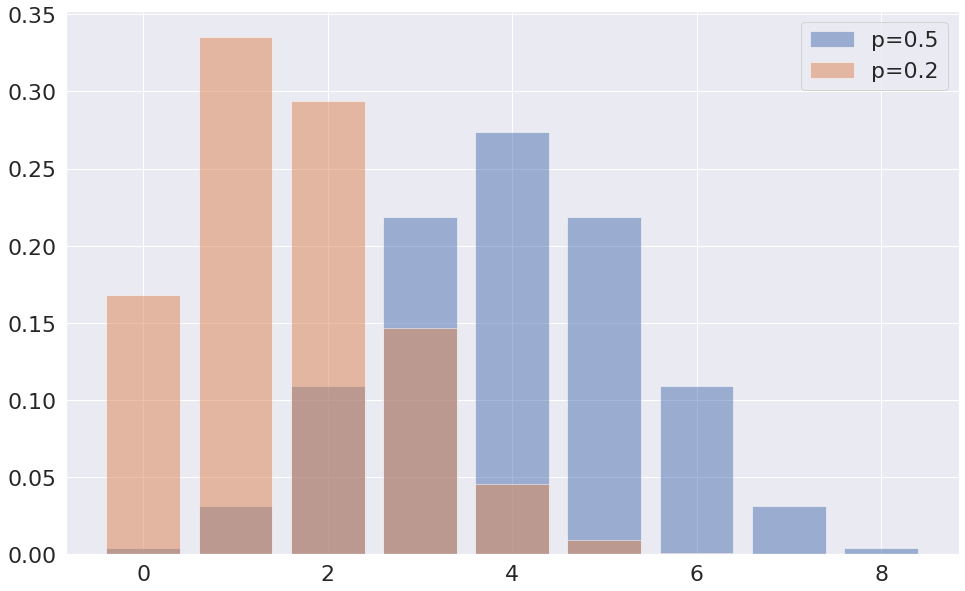

In [4]:
x = np.arange(0, 9)

plt.figure(figsize=(16, 10))

pmf = binom.pmf(x, 8, 0.5)
plt.bar(x, pmf, alpha=0.5, label='p=0.5')

pmf = binom.pmf(x, 8, 0.2)
plt.bar(x, pmf, alpha=0.5, label='p=0.2')

plt.legend()
plt.show()

In [5]:
distr = binom(n=8, p=0.5)

In [6]:
distr.pmf(0), distr.pmf(0) < alpha / 2

(0.003906250000000001, True)

In [7]:
distr.pmf(1), distr.pmf(1) < alpha / 2

(0.031250000000000014, False)

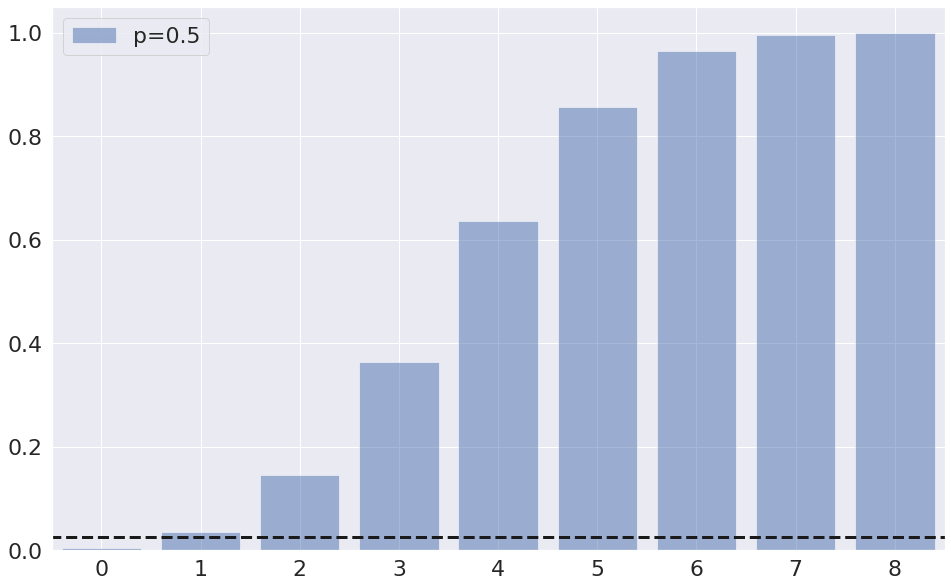

In [8]:
x = np.arange(-1, 10)

plt.figure(figsize=(16, 10))

pmf = binom.cdf(x, 8, 0.5)
plt.bar(x, pmf, alpha=0.5, label='p=0.5')

plt.plot(x, alpha * np.ones(len(x)) / 2, 'k', linewidth=3, linestyle='--')

plt.xlim(-0.5, 8.5)
plt.legend()
plt.show()

#### Получается что не получается построить гипотезу!

Мы применяем так называемое рандомизированное правило.

Т.е. мы говорим что гипотеза $H_0$ о $p = 0.5$ отвергается когда только одна монетка выпадает орлом. 

И отвергаем с вероятностью $w$, когда две монетки выпадают орлом.

Посчитаем эту вероятность $w$:

$$0.0039 + w \cdot 0.03125 = \frac{\alpha}{2}$$


$$w = 0.6752$$

Т.е. увидев только два орла(или две решки, так как задача симметричная) мы должны отклонить гипотезу о $p=0.5$ с вероятностью 0.6752.

In [9]:
def test_hypothesis(samples):
    rejected = (samples == np.random.choice([-1, 7], p=[1 - 0.6752, 0.6752], size=len(samples))).sum()
    rejected += (samples == np.random.choice([-1, 1], p=[1 - 0.6752, 0.6752], size=len(samples))).sum()
    rejected += (samples == 0).sum()
    rejected += (samples == 8).sum()
    return rejected / len(samples)

In [10]:
distr = binom(n=8, p=0.5)
samples = distr.rvs(size=10000000)
print('Эмпирическая ошибка первого рода: {}'.format(test_hypothesis(samples=samples)))

Эмпирическая ошибка первого рода: 0.0499781


In [11]:
ps = np.linspace(0, 1, 100)
betas = []
for p in ps:
    distr = binom(n=8, p=p)
    samples = distr.rvs(size=100000)
    betas.append(1 - test_hypothesis(samples=samples))

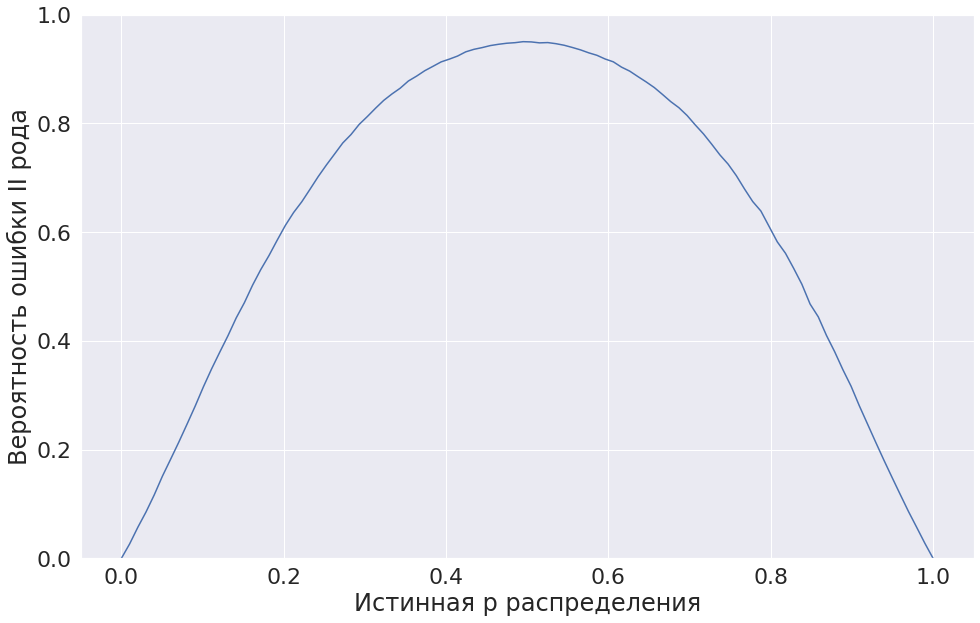

In [12]:
plt.figure(figsize=(16, 10))

plt.plot(ps, betas)
plt.ylabel('Вероятность ошибки II рода')
plt.xlabel('Истинная p распределения')
plt.ylim(0, 1)
plt.show()

##### Неожиданный момент!

Теперь, зная про критерий Неймана-Пирсона, мы может с уверенностью сказать что наш критерий является наиболее мощным среди всех критерией размера $\alpha$!

Действительно, выпишем статистику Неймана-Пирсона:

$$ T = \frac{C_n^k p^k (1 - p)^k}{C_n^k p_0^n} = \frac{p^k (1 - p)^k}{p_0^n}$$

Тогда нужно всего лишь найти threshold для данной статистики:
 
$$\mathbb{P}_{p_0} \left( \frac{p^k (1 - p)^k}{p_0^n} \geq \mathrm{threshold} \right) = \alpha$$

А это как раз соответствует нахождению плотности критических $k$ в хвостиках распределения.

# 2. Генерация тестовых выборок с точностями (prediction accuracy) для предсказания рака груди

https://arxiv.org/abs/1806.08295

The features from the data set describe characteristics of the cell nuclei and are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. As described in [UCI Machine Learning Repository][1], the attribute informations are:

1. ID number
2. Diagnosis (M = malignant, B = benign)

3 - 32  Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


  [1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('data.csv');

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(df.shape))
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.head()


 	 The data frame has 569 rows and 33 columns. 



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#  count how many diagnosis are malignant (M) and how many are benign (B)
diagnosis_all = list(df.shape)[0]
diagnosis_categories = list(df['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                            diagnosis_categories[0], 
                                                                            diagnosis_categories[1]))
features_mean = list(df.columns[1:11])


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


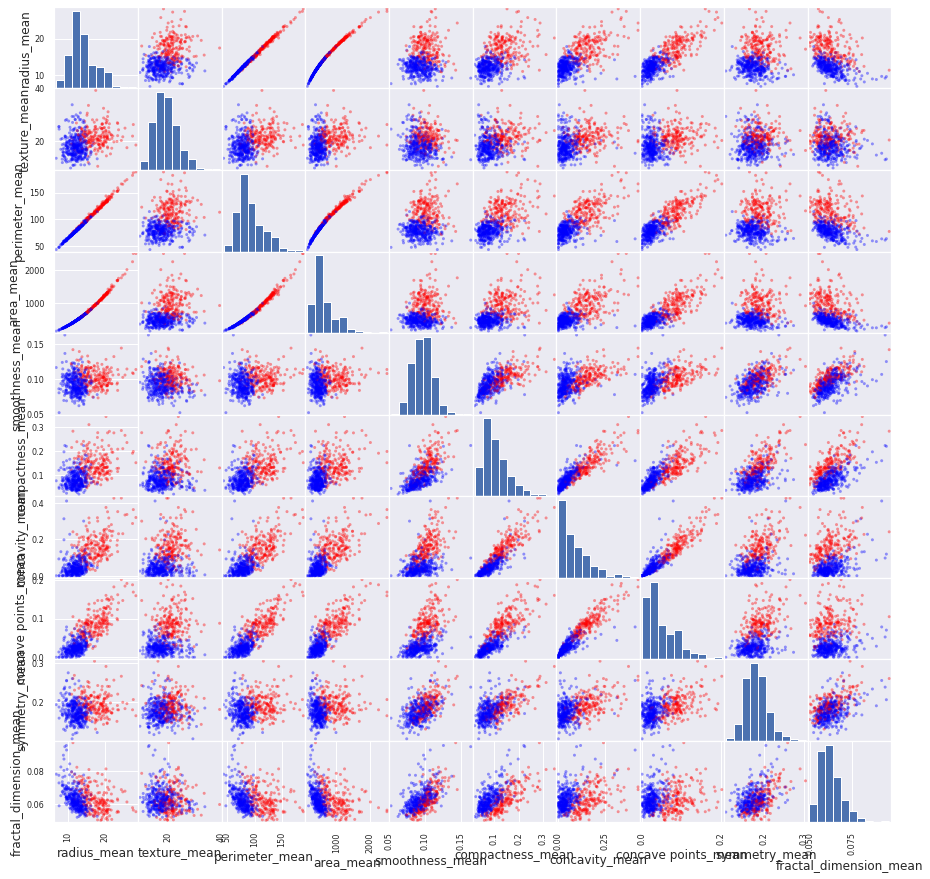

In [16]:
sns.set(font_scale=1)
color_dic = {'M':'red', 'B':'blue'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(df[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

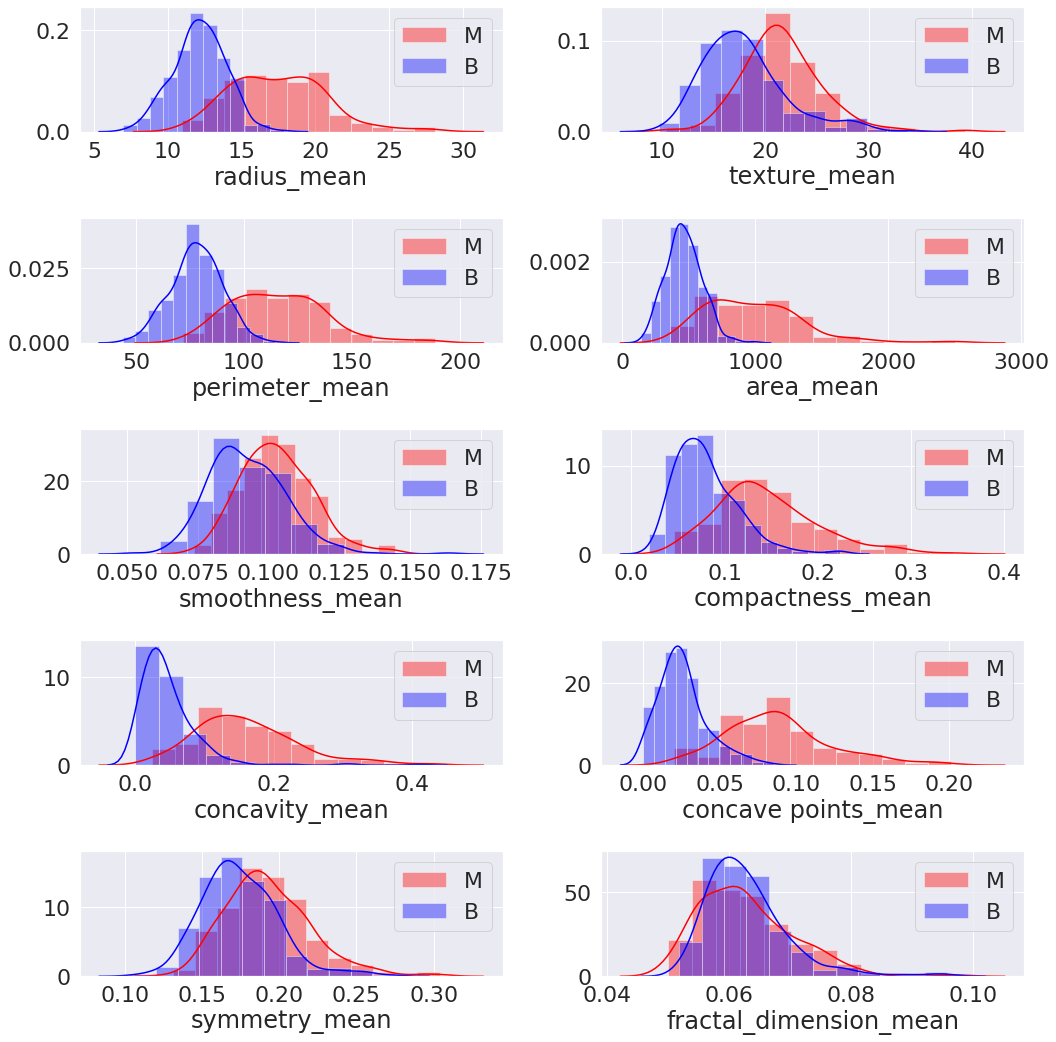

In [17]:
sns.set(font_scale=2)
bins = 12
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(df[df['diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(df[df['diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [18]:
# training the models
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

import time

# binarasing the diagnosis
diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

In [19]:
X = df.loc[:,features_mean]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

#### Тренируем два классификатора - Байес и KNN. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

scores_knn = cross_val_score(clf, X, y, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=100))

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores_knn), np.std(scores_knn) * 2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 93.86%
Cross validation score: 88.56% (+/- 5.26%)
Execution time: 3.7114 seconds 



In [21]:
#The Naive Bayes algorithm applies Bayes’ theorem with the assumption of independence between every pair of features.
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

scores_gnb = cross_val_score(clf, X, y, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=100))

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores_gnb), np.std(scores_gnb)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 94.74%
Cross validation score: 91.22% (+/- 4.86%)
Execution time: 1.9167 seconds 



## 2.1. Оценка ошибки второго рода оценки $H_0$

![](./stat_errors.png)

В статистике различаются два вида ошибок: 
  * ошибка первого рода -- когда мы отвергаем гипотезу, а она верна;
  * ошибка второго рода -- когда мы __не__ отвергаем гипотезу, а она не верна.
  

![Тест Уелча](http://www.statistics4u.com/fundstat_eng/img/hl_explain_welch_test.png)
  
  
$$t = \frac{x_{diff}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}}$$

$$v \approx \frac{\left(\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}\right)^2}{\frac{s_1^4}{N_1^2 (N_1 - 1)} + \frac{s_2^4}{N_2^2 (N_2 - 1)}}$$


#### Реализация теста Уелча
https://github.com/flowersteam/rl-difference-testing/blob/master/test_RL_difference.py

  * `welch_test` - реализация теста Уельча с помощью `stats.ttest_ind`;
  * `compute_beta` - функция для подсчёта вероятности ошибки II рода.
  * `empirical_false_pos_rate` - функция для ??

In [22]:
def welch_test(data1, data2, alpha=0.05, tail=2):
    """
    Wraps around ttest_ind function of scipy, without assuming equal variances.
    Params
    ------
    - data1 (ndarray of dim 1)
    The performance measures of Algo1.
    - data2 (ndarray of dim 1)
    The performance measures of Algo2.
    - alpha (float in ]0,1[)
    The significance level used by the Welch's t-test.
    - tail (1 or 2)
    Perform a one tail or two tail test.
    """
    assert tail == 1 or tail == 2, "tail should be one or two, referring to the one-sided or two-sided t-test."
    data1 = data1.squeeze()
    data2 = data2.squeeze()
    assert alpha < 1 and alpha > 0, "alpha should be between 0 and 1"

    t, p = stats.ttest_ind(data1, data2, equal_var=False)

    if tail == 1:
        alpha = 2 * alpha
    if p <= alpha:
        if t < 0:
            print("\n\n Result of the Welch's t-test at level %05g: μ2>μ1, the test passed with p-value = %05g." % (alpha, p))
        else:
            print("\n\n Result of the Welch's t-test level %05g: μ1>μ2, the test passed with p-value = %05g." % (alpha, p))
    else:
        print("\n\n Results of the Welch's t-test level %05g: there is not enough evidence to prove any order relation between μ1 and μ2." % alpha)
    print("Welch's t-test done.")

In [23]:
welch_test(scores_gnb, scores_knn, alpha, tail=2)



 Result of the Welch's t-test level 00.05: μ1>μ2, the test passed with p-value = 8.46152e-55.
Welch's t-test done.


In [24]:
from tqdm import tqdm
def empirical_false_pos_rate(data, alpha=0.05):
    """
    Compute and plot empirical estimates of the probability of type-I error given a list of performance measures.
    If this list is of size N_data
    This is done for N=2:floor(N_data/2). Two different tests are used: the usual t-test and the
    Welch's t-test, both with significance level alpha.

    Params
    ------
    - data (ndarray of dim 1)
    The performance measures of the considered algorithm.
    - alpha (float in ]0,1[)
    The significance level used by the two tests.
    """
    sizes = np.arange(2, data.size // 2, 2)
    nb_reps = 1000
    results = np.zeros([nb_reps, len(sizes), 2])
    blue = [0, 0.447, 0.7410, 1]
    orange = [0.85, 0.325, 0.098, 1]

    for i_n, n in tqdm(enumerate(sizes)):
        ind = list(range(2 * n))
        for rep in range(nb_reps):
            # take two groups of size n in data, at random
            np.random.shuffle(ind)
            sample_1 = data[ind[:n]]
            sample_2 = data[ind[n:2 * n]]
            # perform the two-tail Welch's t-test
            results[rep, i_n, 0] = stats.ttest_ind(sample_1, sample_2, equal_var=False)[1] < alpha
            # perform the two-tail t-test
            results[rep, i_n, 1] = stats.ttest_ind(sample_1, sample_2, equal_var=True)[1] < alpha

    res_mean = results.mean(axis=0)
    plt.figure(figsize=(16, 10))
    plt.plot(sizes, alpha * np.ones(len(sizes)), c='k', linewidth=5, linestyle='--')
    plt.plot(sizes, res_mean[:, 0], color=blue, linewidth=4, label=u"α=%02d Welch's $t$-test".format(alpha))
    plt.plot(sizes, res_mean[:, 1], color=orange, linewidth=4, label=u"α=%02d Usual's $t$-test".format(alpha))

    plt.legend()
    plt.xlabel('sample size (N)')
    plt.ylabel('P(false positive)')
    
    plt.title(u'Estimation of type-I error rate as a function of $N$ when $α=0.05$')
    plt.show()
    print(
    "\n   Given N={} and α={}, you can expect false positive rates: \n \
    For the Welch's t-test: {} \n     For the ordinal t-test: {}.".format(
        data.size // 2, alpha, res_mean[-1, 0], res_mean[-1, 1])
    )

124it [01:15,  1.58it/s]


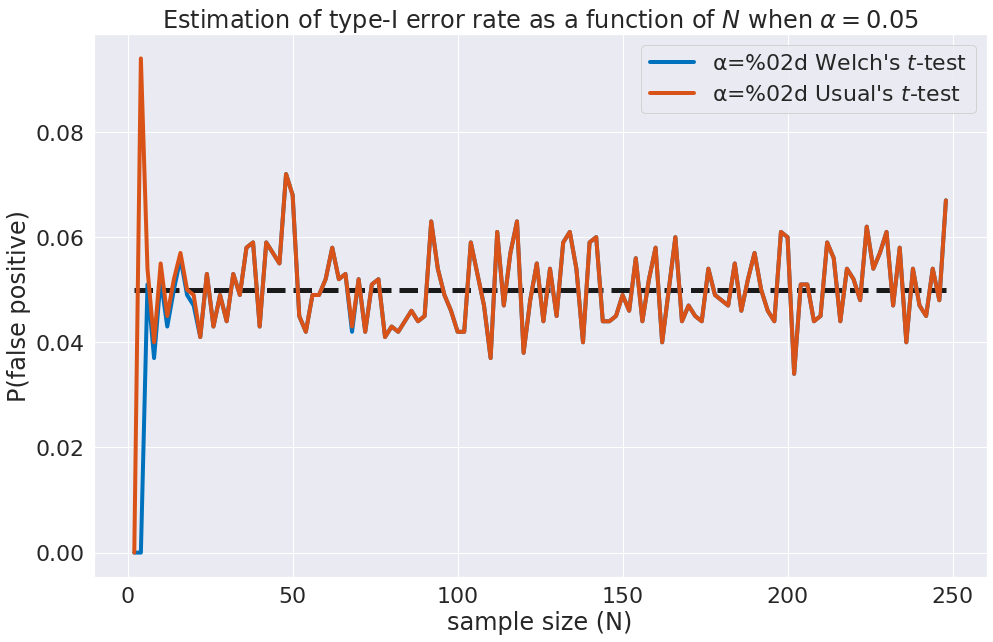


   Given N=250 and α=0.05, you can expect false positive rates: 
     For the Welch's t-test: 0.067 
     For the ordinal t-test: 0.067.


In [25]:
# выборка случайно бьётся на равные части 
# и для них случайно делается разбиение 
# и смотрится на ошибку первого рода
empirical_false_pos_rate(scores_knn, alpha)

In [26]:
scores_knn.mean() - scores_gnb.mean()

-0.026616390919584343

In [27]:
# ошибка первого рода
alpha = 0.05

# ошибка первого рода
beta_requirement = 0.2


if scores_knn.mean() < scores_gnb.mean():
    m_smaller = scores_knn.mean()
else:
    m_smaller = scores_gnb.mean()

# размер выборки
sample_size = range(2, 200, 2)

# effect size -- какую разницу мы хотим уметь детектить?
epsilon = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) * m_smaller
epsilon = epsilon.tolist()
print(epsilon)

[0.008856075413620625, 0.04428037706810312, 0.08856075413620625, 0.1771215082724125, 0.2656822624086187, 0.354243016544825, 0.4428037706810312, 0.5313645248172374, 0.6199252789534436, 0.70848603308965, 0.7970467872258562, 0.8856075413620624]


In [28]:
def compute_beta(epsilon, sample_size, alpha=0.05, data1=None, data2=None, s1=None, s2=None, beta_requirement=0.2):
    """
    Computes the probability of type-II error (or false positive rate) beta to detect and effect size epsilon
    when testing for a difference between performances of Algo1 versus Algo2, using a Welch's t-test
    with significance alpha and sample size N.
    Params
    ------
    - epsilon (int, float or list of int or float)
    The effect size one wants to be able to detect.
    - sample_size (int or list of int)
    The sample size (assumed equal for both algorithms).
    - alpha (float in ]0,1[)
    The significance level used by the Welch's t-test.
    - data1 (ndarray of dim 1)
    The performance measures of Algo1. Optional if s1 is provided.
    - data2 (ndarray of dim 1)
    The performance measures of Algo2. Optional if s2 is provided.
    - s1 (float)
    The standard deviation of Algo1, optional if data1 is provided.
    - s2 (float)
    The standard deviation of Algo2, optional if data2 is provided.
    - beta_requirement (float in ]0,1[, optional)
    Requirements on the value of beta.
    """
    print('\n\nComputing the false negative rate as a function of sample size, for various effect sizes ..')
    assert alpha < 1 and alpha > 0, "alpha must be in ]0,1["
    assert data1 is not None or s1 is not None, "data1 or s1 should be provided"
    assert data2 is not None or s2 is not None, "data1 or s2 should be provided"

    if type(epsilon) is int or type(epsilon) is float:
        epsilon = [epsilon]
        n_eps = 1
    else:
        n_eps = len(epsilon)

    if type(sample_size) is int:
        sample_size = [sample_size]
        n_sample_size = 1
    else:
        n_sample_size = len(sample_size)

    if data1 is not None:
        s1 = data1.std(ddof=1)
    else:
        s1 = s1

    if data2 is not None:
        s2 = data2.std(ddof=1)
    else:
        s2 = s2

    results = np.zeros([n_sample_size, n_eps])
    t_dist = stats.distributions.t

    selected_sample_size = []
    for i_diff, eps in enumerate(epsilon):
        sample_size_found = False  # True if a previous sample size satisfied beta requirements for the current epsilon
        for i_n, n in enumerate(sample_size):
            nu = (s1 ** 2 + s2 ** 2) ** 2 * (n - 1) / (s1 ** 4 + s2 ** 4)
            t_eps = eps / np.sqrt((s1 ** 2 + s2 ** 2) / n)
            t_crit = t_dist.ppf(1 - alpha, nu)
            results[i_n, i_diff] = t_dist.cdf(t_crit - t_eps, nu)
            if results[i_n, i_diff] < beta_requirement and not sample_size_found:
                sample_size_found = True
                selected_sample_size.append(str(n))
        if not sample_size_found:
            selected_sample_size.append('>' + str(n))

    eps_str = str()
    for i in range(n_eps):
        eps_str += '    ε = {}  -->  N: {} \n '.format(epsilon[i], selected_sample_size[i])

    print('\nSample sizes satisfying β={} are:\n {}'.format(beta_requirement, eps_str))
    print('Done.')

    return results


def plot_beta(beta, epsilon, sample_size, beta_requirement=0.2):
    """
    Plot the probability of type-II error beta as a function of the sample size, for various effect sizes epsilon
    Params
    ------
    - beta (ndarray of shape (size(N), size(epsilon))
    Contains values of beta for various epsilon and N
    - epsilon (int, float or list of int or float)
    The effect size one wants to be able to detect.
    - sample_size (int or list of int)
    The sample size (assumed equal for both algorithms).
    - beta_requirement (float in ]0,1[, optional)
    Requirements on the value of beta.
    """
    if type(epsilon) is int or type(epsilon) is float:
        epsilon = [epsilon]
        n_eps = 1
    else:
        n_eps = len(epsilon)

    if type(sample_size) is int:
        sample_size = [sample_size]
        n_sample_size = 1
    else:
        n_sample_size = len(sample_size)

    try:
        assert n_sample_size > 1
    except:
        print("Beta cannot be plotted as a function of only one sample size.")
        return

    legend = [u'$β_{requirement}$']
    plt.figure(figsize=(16, 10))
    plt.plot(sample_size, beta_requirement * np.ones(n_sample_size), 'k', linewidth=3, linestyle='--')
    plt.plot(sample_size, beta, linewidth=2)
    if n_eps > 1:
        print(epsilon)
        legend += [u'ε = {}'.format(epsilon[i]) for i in range(n_eps)]
    else:
        print(epsilon)
        legend += u'ε = {}'.format(epsilon[0])
    plt.legend(legend)
    plt.xlabel('sample size (N)')
    plt.ylabel('P(false negative)')
    plt.title(u'Estimation of type-II error rate as a function of ε and $N$')
    
    plt.show()



Computing the false negative rate as a function of sample size, for various effect sizes ..

Sample sizes satisfying β=0.2 are:
     ε = 0.008856075413620625  -->  N: 104 
     ε = 0.04428037706810312  -->  N: 6 
     ε = 0.08856075413620625  -->  N: 4 
     ε = 0.1771215082724125  -->  N: 2 
     ε = 0.2656822624086187  -->  N: 2 
     ε = 0.354243016544825  -->  N: 2 
     ε = 0.4428037706810312  -->  N: 2 
     ε = 0.5313645248172374  -->  N: 2 
     ε = 0.6199252789534436  -->  N: 2 
     ε = 0.70848603308965  -->  N: 2 
     ε = 0.7970467872258562  -->  N: 2 
     ε = 0.8856075413620624  -->  N: 2 
 
Done.
[0.008856075413620625, 0.04428037706810312, 0.08856075413620625, 0.1771215082724125, 0.2656822624086187, 0.354243016544825, 0.4428037706810312, 0.5313645248172374, 0.6199252789534436, 0.70848603308965, 0.7970467872258562, 0.8856075413620624]


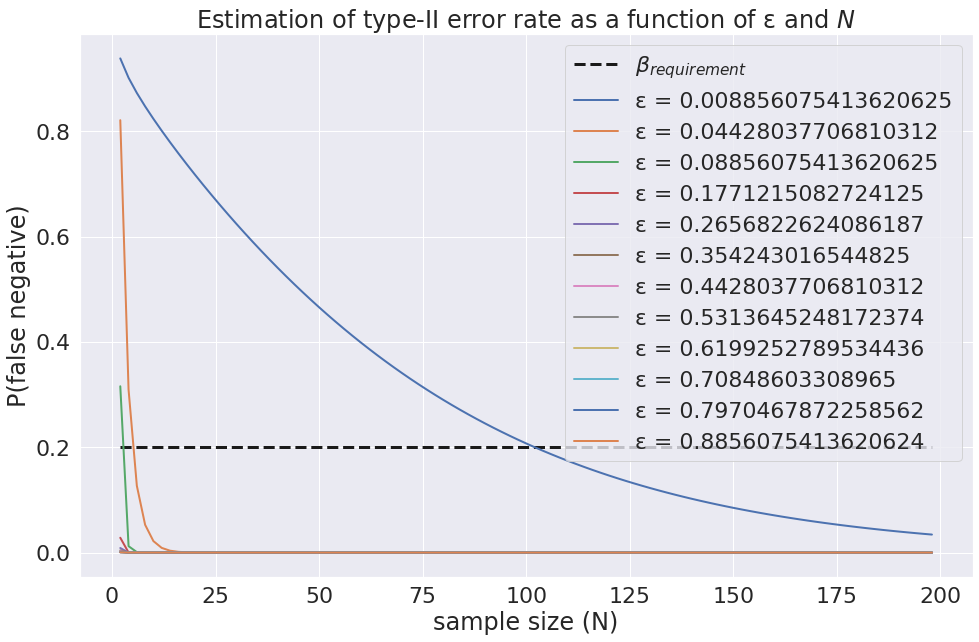

In [29]:
# чисто аналитический анализ
# выборки используются 
# только чтобы посчитать std
# разрешаем гипотезу относительно | \mu_1 - \mu_2 |

beta = compute_beta(epsilon, sample_size, alpha, 
                    scores_knn, scores_gnb, beta_requirement=beta_requirement)

plot_beta(beta, epsilon, sample_size, beta_requirement=beta_requirement)

# 3. Парадокс Линдлей

### Часть первая

У нас есть наблюдения $\{ x \}_{i=1}^{n}$, которые подчиняются нормальному распределению:

$$x_i \sim \mathcal{N}(x | \mu, \sigma^2),$$

где $\mu$ нам неизвестно, но известно априрное распределение на этот параметр:

$$p(\mu) = \frac{1}{2} \delta(\mu | \mu_0) + \frac{1}{2} \mathcal{N}(\mu | \mu_0, \sigma^2)$$

Мы пронаблюдали много $x_i$ и посчитали следующую статистику:

$$\bar{x} = \mu_0 + 1.96 \frac{\sigma}{\sqrt{n}}$$

### Задача. Протестируйте гипотезу:

$$H_0:\mu = \mu_0 ~~~ \mathrm{vs} ~~~ H_1:\mu\neq\mu_0$$


1. Как статист
2. Как баесианец

In [30]:
from scipy.stats import norm

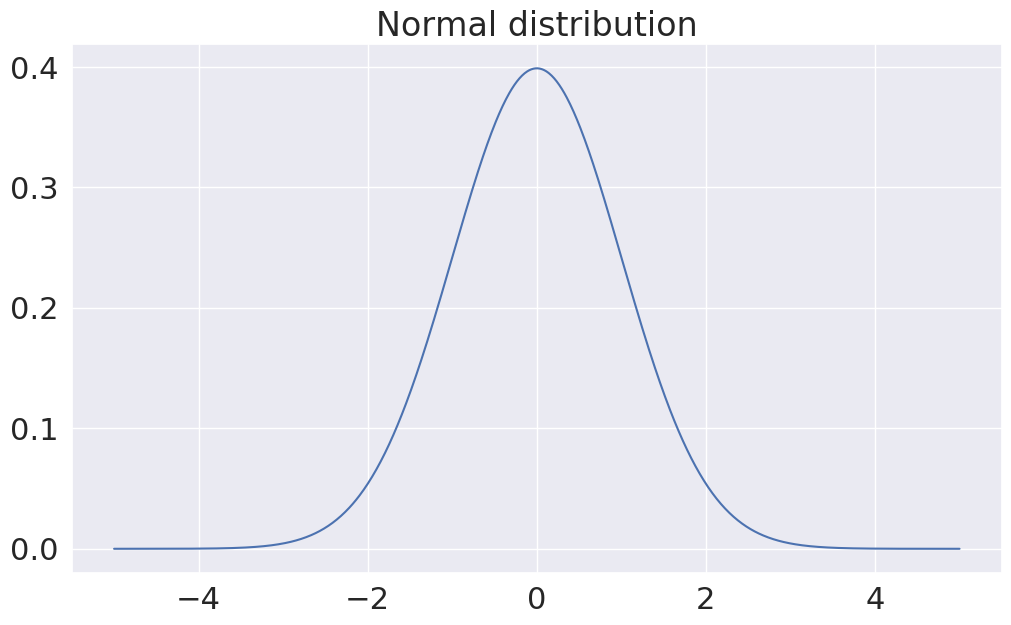

In [31]:
sigma = 1.
xs = np.linspace(-5, 5, 1000)
plt.figure(figsize=(12, 7), dpi=100)
plt.plot(xs, norm(0, sigma).pdf(xs))
plt.title('Normal distribution')
plt.show()

## Зададим все параметры задачи

In [32]:
mu_0 = 0.
sigma = 1.
n = 500

x_bar = mu_0 + 1.96 * sigma / np.sqrt(n)

### 1. Протестируем её как статисты

Очевидно, что:

$$\bar{x} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$$

In [33]:
(x_bar - mu_0) / ( sigma / np.sqrt(n) )

1.9599999999999997

In [34]:
alpha = 0.05
norm.ppf(1 - alpha / 2)

1.959963984540054

Сделать выводы и проговорить их

### 2. Протестируем её как байесианцы

$$p(\mu = \mu_0 | \bar{x}) =  \frac{p(\bar{x} | \mu = \mu_0) p(\mu | \mu = \mu_0)}{p(\bar{x} | \mu = \mu_0) p(\mu | \mu = \mu_0) + p(\bar{x} | \mu \neq \mu_0) p(\mu | \mu \neq \mu_0)}$$

In [35]:
def bayesian_probability(mu_0, sigma, n):
    p_x_h_0 = norm(mu_0, sigma / np.sqrt(n)).pdf(mu_0 + 1.96 * sigma / np.sqrt(n))
    p_x_h_1 = norm(mu_0, np.sqrt(sigma**2 + sigma**2 / n)).pdf(mu_0 + 1.96 * sigma / np.sqrt(n))
    return p_x_h_0 / (p_x_h_0 + p_x_h_1)

In [36]:
ns = np.logspace(0.5, 5, 100).astype(int)
bayesian_probabilities = []
for n in ns:
    bayesian_probabilities.append(bayesian_probability(mu_0, sigma, n))

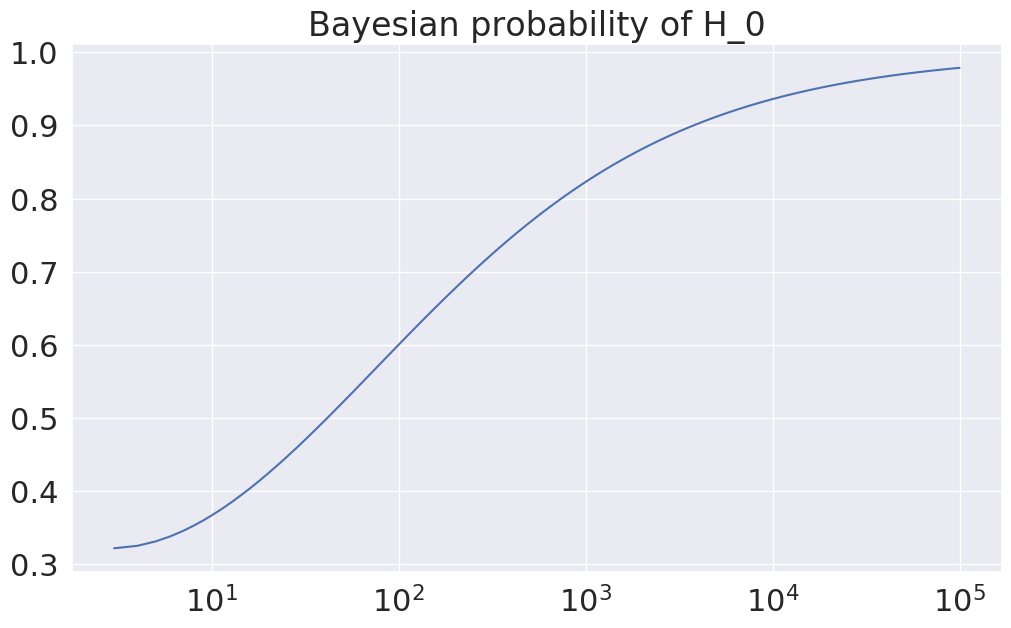

In [37]:
plt.figure(figsize=(12, 7), dpi=100)
plt.plot(ns, bayesian_probabilities)
plt.title('Bayesian probability of H_0')
plt.xscale('log')
plt.show()

### Часть вторая

Рассмотрим более сложное априорное распределение:

$$p(\mu) = p_1 \delta(\mu | \mu_0) + p_2 \mathcal{N}(\mu | \mu_0, \tau^2), \tau \rightarrow + \infty$$


И, кроме того, у нас есть только одно измерение $x$, т.е. $n = 1$.

In [44]:
def bayesian_probability(x, mu_0, sigma, tau, p_1=0.5, p_2=0.5):
    p_x_h_0 = norm(mu_0, sigma).pdf(x)
    p_x_h_1 = norm(mu_0, np.sqrt(tau**2 + sigma**2)).pdf(x)
    return p_1 * p_x_h_0 / (p_1 * p_x_h_0 + p_2 * p_x_h_1)

In [45]:
x = 0.0

In [46]:
taus = np.logspace(0.5, 5, 40).astype(int)
xs = np.linspace(0., 5., 10)
bayesian_probabilities = []

for tau in taus:
    bayesian_probabilities.append(
        [bayesian_probability(x, mu_0, sigma, tau) for x in xs]
    )

In [47]:
bayesian_probabilities = np.array(bayesian_probabilities)

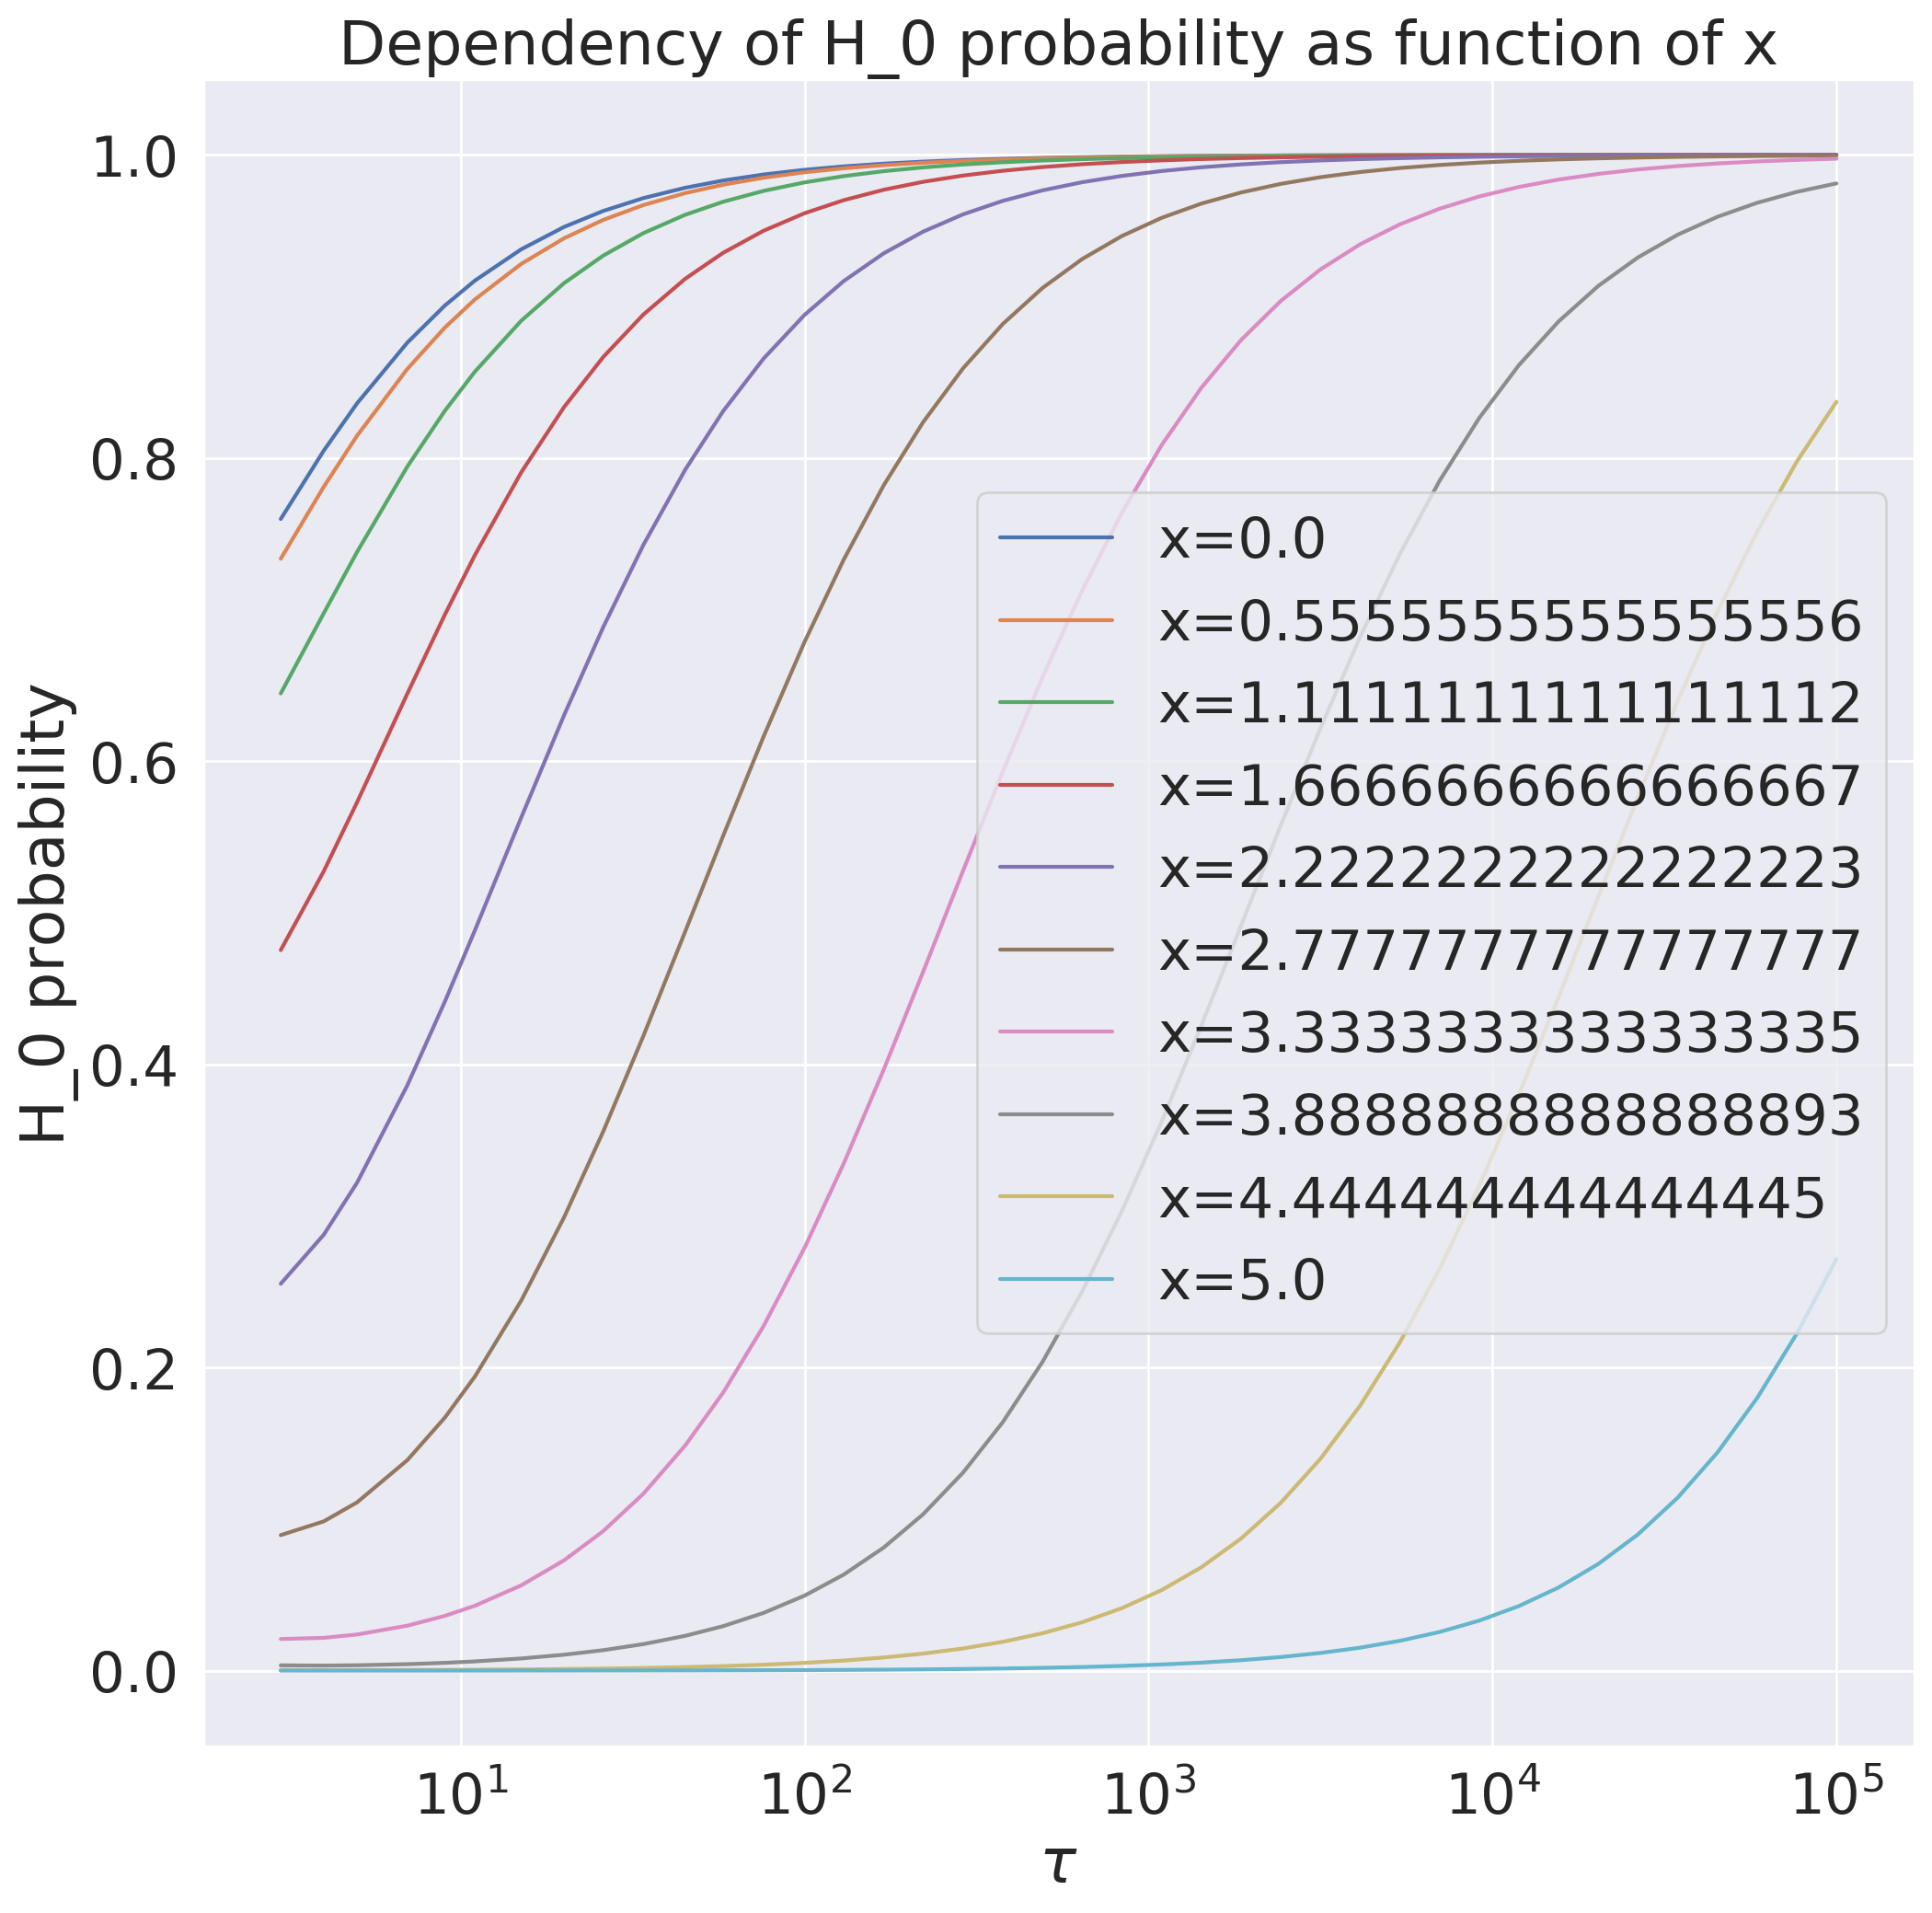

In [49]:
plt.figure(figsize=(12, 12), dpi=200)
for i, x in enumerate(xs):
    plt.plot(taus, bayesian_probabilities[:, i], label='x={}'.format(x))
plt.xscale('log')
plt.title("Dependency of H_0 probability as function of x")
plt.xlabel(r'$\tau$')
plt.ylabel('H_0 probability')
plt.legend()
plt.show()